In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML,display 

In [2]:
business = pd.read_csv('business.csv')
economy = pd.read_csv('economy.csv')

### Make 'class' column to identify which from economy and business

In [3]:
business['class'] = "business"

In [4]:
economy['class'] = "economy"

### Concat both dataset with new indexing

In [5]:
data = pd.concat([economy,business], ignore_index=True)

In [6]:
data

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business
300257,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business


### Duplicated rows remove

In [7]:
data.duplicated().sum() 

2

In [9]:
data.drop_duplicates(inplace=True)

# 1) Data Cleaning Process - Start

### clean and text mine on 'stop' column 

In [10]:
def stopsfind(stops): # "1-stop\n\t\t\" , "1-stop\n\t\tVia Vishakhapatnam\n\t\t\"    
    stops = stops.replace('Via','').split()
    if stops[0] == "1-stop":
            stops[0] = "one"
    elif stops[0] == "non-stop":
            stops[0] = "zero"
    else:
            stops[0] = "two_or_more"
    if len(stops) == 1:
        return pd.Series([stops[0],"NAN"])
    else:
        return pd.Series([stops[0],stops[1]])

In [11]:
data[['stops','stops_via']] = data['stop'].apply(stopsfind)

In [12]:
data

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,stops,stops_via
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,zero,NAN
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,zero,NAN
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,zero,NAN
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,zero,NAN
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,zero,NAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business,one,NAN
300257,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business,one,NAN
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business,one,NAN
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business,one,NAN


In [15]:
data['stops'].value_counts()

one            250927
zero            36044
two_or_more     13288
Name: stops, dtype: int64

### string hours convert into integer minute on 'time_taken' column and create new column 'time_min'

In [16]:
def time_min(timming):
    timming = timming.replace('h','').replace('m','')
    
    if len(timming.split())==1:
        timming = timming.split('.')
    else:
        timming = timming.split()
        
    timming = int(timming[0])*60 + int(timming[1])

    return timming

In [17]:
data['time_min']=data['time_taken'].apply(time_min)

In [18]:
data.head(2)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,stops,stops_via,time_min
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,zero,NAN,130
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,zero,NAN,140


### 'ch_code' and 'num_code' merge and create new column 'flight'

In [20]:
data['ch_code'][0] + "-" + str(data['num_code'][0])

'SG-8709'

In [21]:
def codemake(x,y):
    return x + "-" + str(y)

In [22]:
data['flight']=data[['ch_code','num_code']].apply(lambda x: codemake(*x),axis=1)

In [23]:
data

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,stops,stops_via,time_min,flight
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,zero,NAN,130,SG-8709
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,zero,NAN,140,SG-8157
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,zero,NAN,130,I5-764
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,zero,NAN,135,UK-995
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,zero,NAN,140,UK-963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business,one,NAN,605,UK-822
300257,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business,one,NAN,625,UK-826
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business,one,NAN,830,UK-832
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business,one,NAN,600,UK-828


#### Based on 'dep_time' and 'arr_time' convert into day from like(early morning, morning, evening, afternon, night)

In [25]:
# 4 - 7 early morning
# 7 - 12  morning
# 12 - 17 afternoon
# 17 - 20 evening
# 20 - 4 night

In [26]:
def deptime(tmm):
    tmm = int(tmm.split(":")[0])
    if tmm >= 7 and tmm <12:
        day = 'Morning'
    elif tmm >=12 and tmm<17:
        day = 'Afternoon'
    elif tmm >=17 and tmm<20:
        day = 'Evening'
    elif tmm >=20 and tmm <4:
        day = "Night"
    else:
        day = 'Early morning'
    return day

In [27]:
data['departure_time'] = data['dep_time'].apply(deptime)

In [28]:
data['arrival_time'] = data['arr_time'].apply(deptime)

### Convert string 'price' column into integer

In [31]:
data['price'][0].replace(',','')

'5953'

In [32]:
data['price'] = data['price'].apply(lambda x: int(x.replace(',','')) )

### Drop unnecessary columns

In [33]:
data.drop([
    'ch_code',
    'num_code',
    'time_taken',
    'date',
    'stop'],
    axis=1,
    inplace=True
) 

### Here is final cleaned data

In [35]:
data

,airline,dep_time,from,arr_time,to,price,class,stops,stops_via,time_min,flight,departure_time,arrival_time
0,SpiceJet,18:55,Delhi,21:05,Mumbai,5953,economy,zero,NAN,130,SG-8709,Evening,Early morning
1,SpiceJet,06:20,Delhi,08:40,Mumbai,5953,economy,zero,NAN,140,SG-8157,Early morning,Morning
2,AirAsia,04:25,Delhi,06:35,Mumbai,5956,economy,zero,NAN,130,I5-764,Early morning,Early morning
3,Vistara,10:20,Delhi,12:35,Mumbai,5955,economy,zero,NAN,135,UK-995,Morning,Afternoon
4,Vistara,08:50,Delhi,11:10,Mumbai,5955,economy,zero,NAN,140,UK-963,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,09:45,Chennai,19:50,Hyderabad,69265,business,one,NAN,605,UK-822,Morning,Evening
300257,Vistara,12:30,Chennai,22:55,Hyderabad,77105,business,one,NAN,625,UK-826,Afternoon,Early morning
300258,Vistara,07:05,Chennai,20:55,Hyderabad,79099,business,one,NAN,830,UK-832,Morning,Early morning
300259,Vistara,07:00,Chennai,17:00,Hyderabad,81585,business,one,NAN,600,UK-828,Morning,Evening


# Data Cleaning Process - End

# 2) EDA Process -  Start

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         300259 non-null  object
 1   dep_time        300259 non-null  object
 2   from            300259 non-null  object
 3   arr_time        300259 non-null  object
 4   to              300259 non-null  object
 5   price           300259 non-null  int64 
 6   class           300259 non-null  object
 7   stops           300259 non-null  object
 8   stops_via       300259 non-null  object
 9   time_min        300259 non-null  int64 
 10  flight          300259 non-null  object
 11  departure_time  300259 non-null  object
 12  arrival_time    300259 non-null  object
dtypes: int64(2), object(11)
memory usage: 40.1+ MB


### Missing value find

In [37]:
a = round((data.isnull().mean()*100),2)
mssingcolumn=[]
missingdata=[]
missingnum=[]
for i in range(len(a)):
    if a.values[i] != 0:
        mssingcolumn.append(a.keys()[i])
for i in mssingcolumn:
    missingdata.append(round((data[i].isnull().mean()*100),2))
    missingnum.append(data[i].isnull().sum())
missing=pd.DataFrame({'column':mssingcolumn,'missing percent':missingdata,'missing num':missingnum}) 
missing 

,column,missing percent,missing num


### Value counts apply on every column

In [38]:
allcol=data.nunique().sort_values().keys()[:-1]
sapret_column=[]
for i in range(len(allcol)):
    a=data[allcol[i]].value_counts()
    if len(a) >= 15:
        break;
    sapret_column.append(allcol[i])
    display(HTML(f'---------------- <b>  {allcol[i]} - column  </b> ----------------'))
    print(a)

economy     206772
business     93487
Name: class, dtype: int64


one            250927
zero            36044
two_or_more     13288
Name: stops, dtype: int64


Morning          99424
Early morning    88562
Afternoon        59504
Evening          52769
Name: departure_time, dtype: int64


Early morning    110278
Morning           74970
Evening           61578
Afternoon         53433
Name: arrival_time, dtype: int64


Delhi        61343
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: from, dtype: int64


Mumbai       59107
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: to, dtype: int64


Vistara      127859
Air India     80892
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64


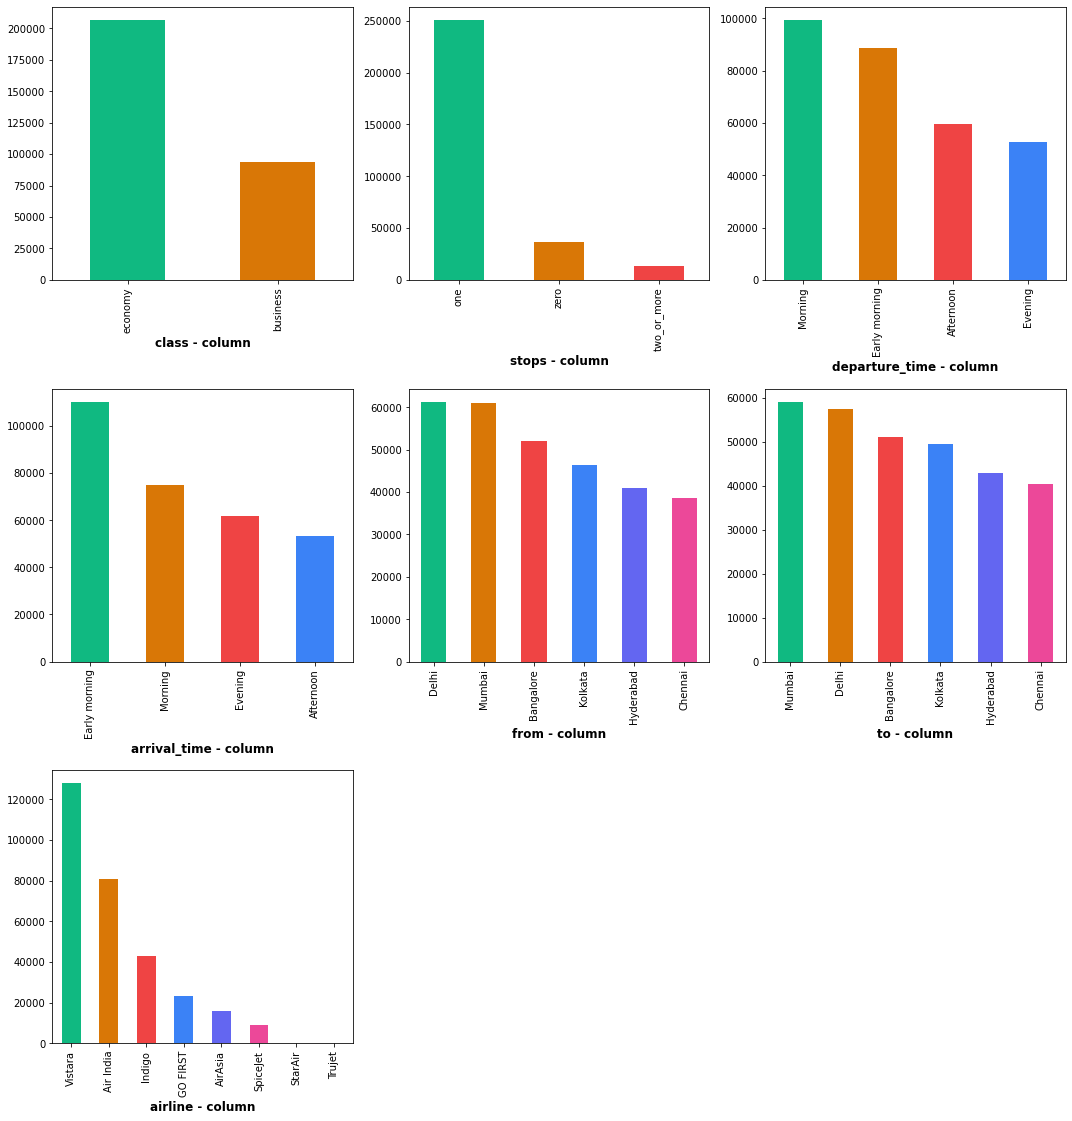

In [41]:
plt.figure(figsize=(15,20))
for i in range(len(sapret_column)):
    if i == 40:
        break;
    plt.subplot(4,3,i+1) 
    plt.tight_layout() # for maintain spaceing between multple graphs
    plt.xlabel(f"{sapret_column[i]} - column",fontsize=12.0,fontweight='bold') 
    data[sapret_column[i]].value_counts().plot(kind="bar", color = ['#10B981','#D97706','#EF4444','#3B82F6','#6366F1','#EC4899'])  

In [73]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
price,300259.0,20883.800386,22695.96223,1105.0,4783.0,7425.0,42521.0,123071.0
time_min,300259.0,733.062369,431.57538,50.0,405.0,675.0,970.0,2990.0


### Skewness check

In [95]:
for i in data.dtypes[data.dtypes != 'object'].index:
    val = round(data[i].skew(),3)
    if val>1 or val<-1:
        skewed = "highly moderated"
    elif (val>0.5 and val<1) or (val<-0.5 and val>-1 ):
        skewed = "moderatly skewed"
    else:
        skewed = "fairly symmetrical"
    display(HTML(f'Skewness of <b>{i}</b> is <b>{val}</b> which is <b>{skewed}</b>'))

<AxesSubplot:xlabel='price', ylabel='Density'>

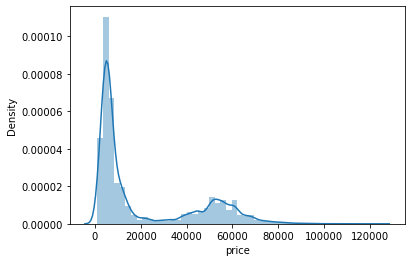

In [91]:
sns.distplot(data['price'])

In [114]:
np.log(data['price']).skew()  # skewness lies faily distributed 

0.40469869808173214

<AxesSubplot:xlabel='price', ylabel='Density'>

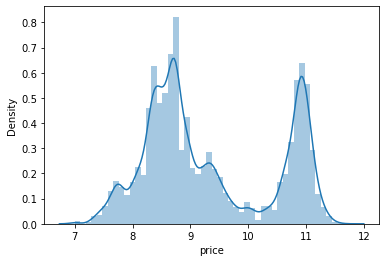

In [92]:
sns.distplot(np.log(data['price'])) 

In [120]:
data.sample(2)

,airline,dep_time,from,arr_time,to,price,class,stops,stops_via,time_min,flight,departure_time,arrival_time
254667,Vistara,08:00,Bangalore,22:45,Kolkata,60508,business,one,NAN,885,UK-808,Morning,Early morning
110271,Vistara,09:30,Bangalore,07:50,Hyderabad,8260,economy,one,NAN,1340,UK-852,Morning,Morning


In [121]:
data.groupby('airline').sum()

,price,time_min
airline,,
Air India,1901529790,75249880
AirAsia,65858089,8636405
GO FIRST,130994795,12173654
Indigo,229580207,14993230
SpiceJet,55681482,6801230
StarAir,300892,8905
Trujet,133030,9515
Vistara,3886470735,102235755


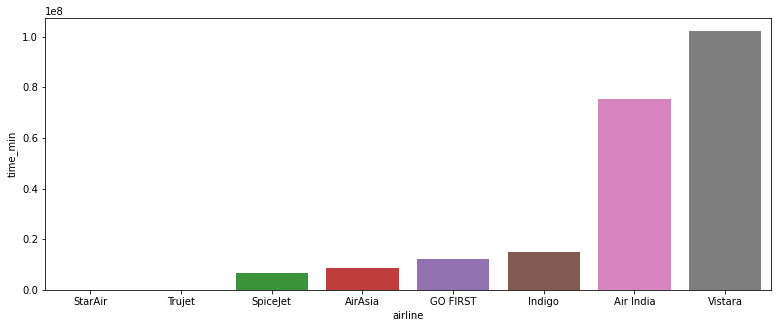

In [224]:
plt.figure(figsize=(13,5))
col1="airline"
col2="time_min"
sns.barplot(
        data.groupby(col1).sum()[col2].sort_values().index,
        data.groupby(col1).sum()[col2].sort_values()
)
display(HTML('<h3>Which Airline take more time ?</h4>'))

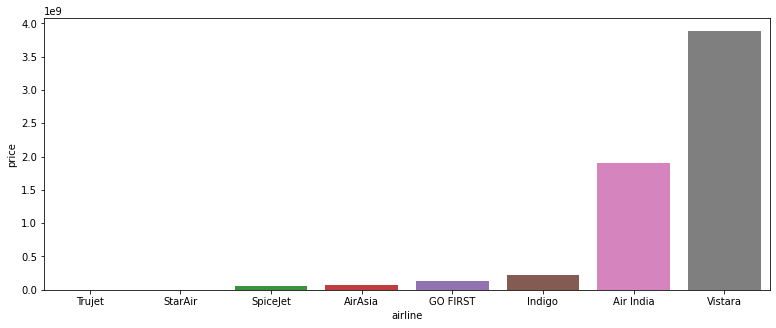

In [223]:
plt.figure(figsize=(13,5))
col1="airline"
col2="price"
sns.barplot(
        data.groupby(col1).sum()[col2].sort_values().index,
        data.groupby(col1).sum()[col2].sort_values()
)
display(HTML('<h3>Which Airline take more money?</h4>'))

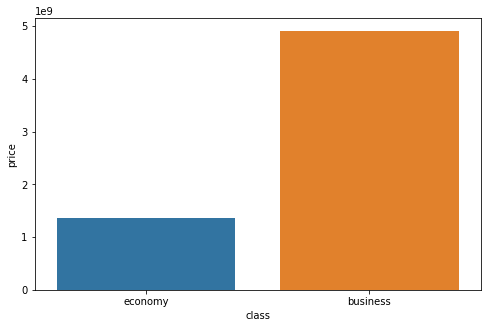

In [228]:
plt.figure(figsize=(8,5))
col1="class"
col2="price"
sns.barplot(
        data.groupby(col1).sum()[col2].sort_values().index,
        data.groupby(col1).sum()[col2].sort_values()
)
display(HTML('<h3>Which class take more money?</h4>'))

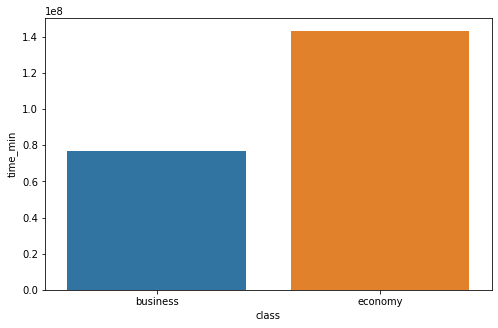

In [229]:
plt.figure(figsize=(8,5))
col1="class"
col2="time_min"
sns.barplot(
        data.groupby(col1).sum()[col2].sort_values().index,
        data.groupby(col1).sum()[col2].sort_values()
)
display(HTML('<h3>Which class take more time?</h4>'))

In [303]:
data.groupby(['class','airline']).mean() 

price    time_min
class    airline                            
business Air India  47131.039212  878.090309
         Vistara    55477.027777  791.935747
economy  Air India   7313.682169  966.005438
         AirAsia     4091.072742  536.489315
         GO FIRST    5651.930578  525.247185
         Indigo      5324.216303  347.709416
         SpiceJet    6179.278881  754.769726
         StarAir     4932.655738  145.983607
         Trujet      3244.634146  232.073171
         Vistara     7806.943645  806.498588

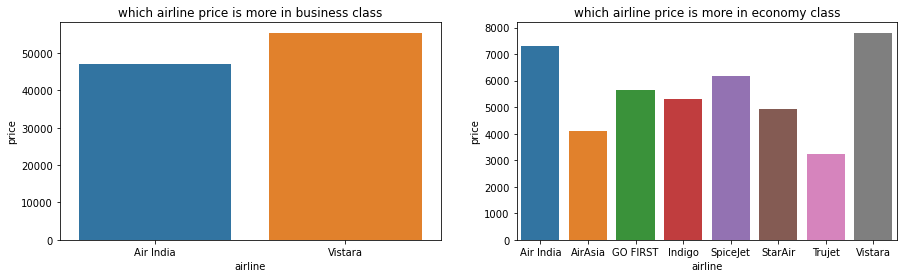

In [310]:
plt.figure(figsize=(15,4))
a = data.groupby(['class','airline']).mean().reset_index()

plt.subplot(1,2,1)
plt.title('which airline price is more in business class')
d1 = a[a['class'] == "business"]
sns.barplot(d1['airline'],d1['price'].sort_values())

plt.subplot(1,2,2)
plt.title('which airline price is more in economy class')
d2 = a[a['class'] == "economy"]
sns.barplot(d2['airline'],d2['price'])

plt.show()